<a href="https://colab.research.google.com/github/angor0147/NewFolderUnity/blob/main/artificial-intelligence/rbf-stock-prec/rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [26]:
col = [ "Date", "Closing" ]
database = pd.read_csv("bitcoin.csv", usecols=col)
database = database[:366]


In [27]:
database.describe()

,Closing
count,365.000000
mean,47729.135473
std,9520.075275
min,29789.940000
25%,39283.900000
50%,47833.621120
75%,56273.378700
max,67553.948930


In [29]:
max = database.Closing.max()
data = pd.DataFrame({'val': database.Closing / max})
data.describe()

,val
count,365.000000
mean,0.706534
std,0.140926
min,0.440980
25%,0.581519
50%,0.708080
75%,0.833014
max,1.000000


In [59]:
def segment_data(data, train_ratio):
    separation_point = int(np.floor(len(data) * train_ratio))
    return (data[:separation_point], data[separation_point:], separation_point)

(train_data, test_data, seg) = segment_data(list(data.val), .8)

len(train_data)

292

In [85]:
len(np.array(train_data))

292

In [91]:
class RBF():
    def __init__(self, train_data, pred_win=1, learn_rate=.05):
        self.train_data = train_data
        self.pred_win = pred_win
        self.hidden_dim = len(train_data)-pred_win
        self.errorDataArray = []
        self.learning_rate = learn_rate

        self.G = np.zeros(self.hidden_dim)
        self.W = 2 * np.random.random(self.hidden_dim) - 1
        self.Xi = [ train_data[i:i+self.pred_win] for i in range(0, self.hidden_dim) ]


    def g(self, x, xi):
        return np.exp(-np.power(np.linalg.norm(x-xi), 2))


    def compute(self, x):
        if len(x) != self.pred_win:
            raise Exception("Input vector dim invalid")
        self.G = np.array([ self.g(x, np.array(self.Xi[i])) for i in range(self.hidden_dim) ])
        return np.sum(np.multiply(self.G, self.W))


    def update(self, error):
        for i in range(self.hidden_dim):
            deltaW = self.learning_rate * self.G[i] * error
            self.W[i] += deltaW


    def fit(self, iters=100):
        for i in range(iters):
            for j in range(len(self.Xi)):  

                x = self.Xi[j]
                z = self.train_data[len(x)+j]

                Y = self.compute(np.array(x))
                err = Y -z
                self.errorDataArray.append(err)
                self.update(err)

In [94]:
rbf = RBF(train_data, pred_win=1)

rbf.fit(100)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [105]:
len(rbf.errorDataArray)

29100

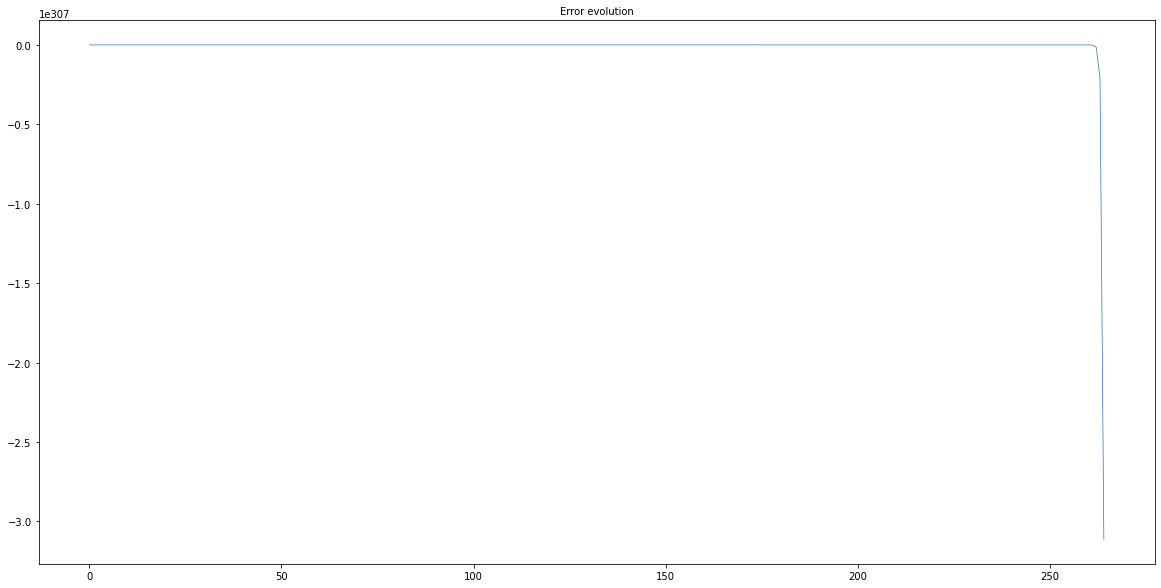

29100

In [106]:
plt.figure(figsize=(20,10))
plt.title('Error evolution', size=10)
plt.plot([i for i in range(0,len(rbf.errorDataArray))],rbf.errorDataArray, linewidth=0.69)
plt.show()
len(rbf.errorDataArray)

In [93]:
train_data[80:83]

[0.8749131561686191, 0.8588439450093299, 0.8280298243994899]

In [39]:
rbf.compute(np.array([0.1]))

-8.191718965128034

In [43]:
def g(self, x, xi):
        return np.exp(-np.power(np.linalg.norm(x-xi), 2))

In [44]:
HIDDEN_DIM = 150
W = 2 * np.random.random(HIDDEN_DIM) - 1
G = [ 0 for i in range(HIDDEN_DIM) ]

for step in range(100):
    for i in range(0, HIDDEN_DIM):
        x = train_data[i]
        z = train_data[i+1]
        for ig in range(len(G)):
            G[ig] = g(np.array(x), np.array(data[ig]))
        Y = np.sum(np.multiply(G, W))
        err = z - Y
        for iw in range(len(W)):
            deltaW = LEARNING_RATE * G[iw] * err
            W[iw] += deltaW

KeyError: ignored